In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("../../../Divar.csv")

C:\Users\Rumi\AppData\Local\Temp\ipykernel_25632\2225313960.py:6: DtypeWarning: Columns (11,27,29,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../../../Divar.csv")


<div  dir="rtl" align="right">

در دسته‌بندی امکانات موجود در آگهی‌ها می‌توانیم آنها را به دو دسته‌ی امکانات لاکچری(استخر، باربیکیو، سونا، جکوزی) و امکانات غیر لاکچری تقسیم کنیم. فرضیه‌ی ما این است که میانگین مبلغ قیمت برای وجود ویژگی‌های لاکچری افزایش چشم‌گیری دارد. اما آیا این میانگین برای وجود امکانات غیرلاکچری نیز تفاوت معناداری دارد؟

<div  dir="rtl" align="right">


### جدا کردن فضا های فرضیه:


#### امکانات لاکچری
فرضیه صفر (H₀)

میانگین قیمت آگهی‌هایی که حداقل یکی از امکانات لاکچری (استخر، سونا، جکوزی یا باربیکیو) را دارند،
با میانگین قیمت آگهی‌هایی که هیچ‌کدام از این امکانات را ندارند تفاوت معناداری ندارد.

فرضیه مقابل (H₁)

میانگین قیمت آگهی‌هایی که حداقل یکی از امکانات لاکچری (استخر، سونا، جکوزی یا باربیکیو) را دارند،
به‌طور معناداری بیشتر از میانگین قیمت آگهی‌هایی است که فاقد این امکانات هستند.


#### امکانات غیرلاکچری

فرضیه صفر (H₀)

میانگین قیمت آگهی‌هایی که دارای امکانات غیرلاکچری هستند،
با میانگین قیمت آگهی‌هایی که فاقد این امکانات‌اند تفاوت معناداری ندارد.

فرضیه مقابل (H₁)

میانگین قیمت آگهی‌هایی که دارای امکانات غیرلاکچری هستند،
با میانگین قیمت آگهی‌هایی که فاقد این امکانات‌اند تفاوت معناداری دارد.

In [ ]:
luxury_columns = [
    'has_pool',
    'has_jacuzzi',
    'has_sauna', 
    'has_barbecue']

df4 = df.copy()
df4 = df4[df4["price_value"] > 10000000] #Zir 1 million toman melk be forush nemiresad
df4 = df4[df4["price_value"] < 1e+13] # Va balae 1 trilion toman ham nist
df4 = df4[~df4["price_value"].isna()]
df4["has_luxury"] = df4[luxury_columns].any(axis=1)
df_luxury = df4[df4["has_luxury"]]
df_not_luxury = df4[~df4["has_luxury"]]

non_luxury_columns = [
    'has_elevator',
    'has_parking',
    'has_warehouse',
    'has_balcony',
    'has_heating_system',
    'has_cooling_system',
    'has_security_guard',
    'has_water',
    'has_gas',
    'has_electricity',
    'has_restroom'
]

df4["has_non_luxury"] = df4[non_luxury_columns].any(axis= 1)

df_non_luxury = df4[df4["has_non_luxury"]]
df_not_non_luxury = df4[~df4["has_non_luxury"]]

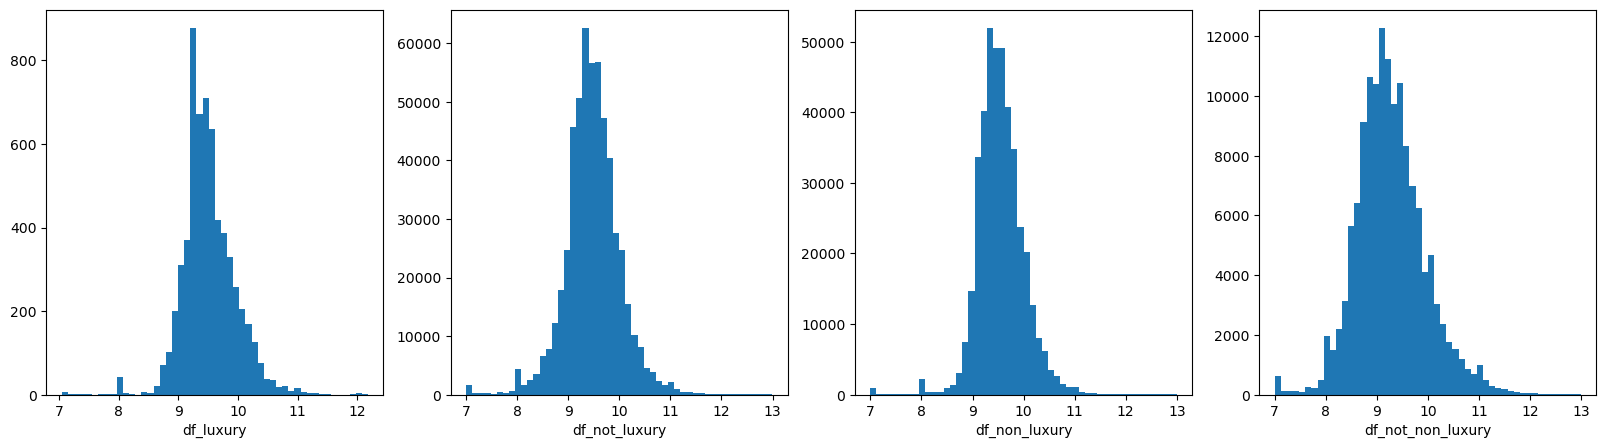

In [76]:
fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(20, 5))

dfs = [df_luxury, df_not_luxury ,df_non_luxury , df_not_non_luxury]
lables = ["df_luxury", "df_not_luxury" ,"df_non_luxury" , "df_not_non_luxury"]
for i , dfx in enumerate(dfs):
    axes[i].hist(np.log10(dfx["price_value"]), bins=50)
    axes[i].set_xlabel(lables[i])


plt.show()

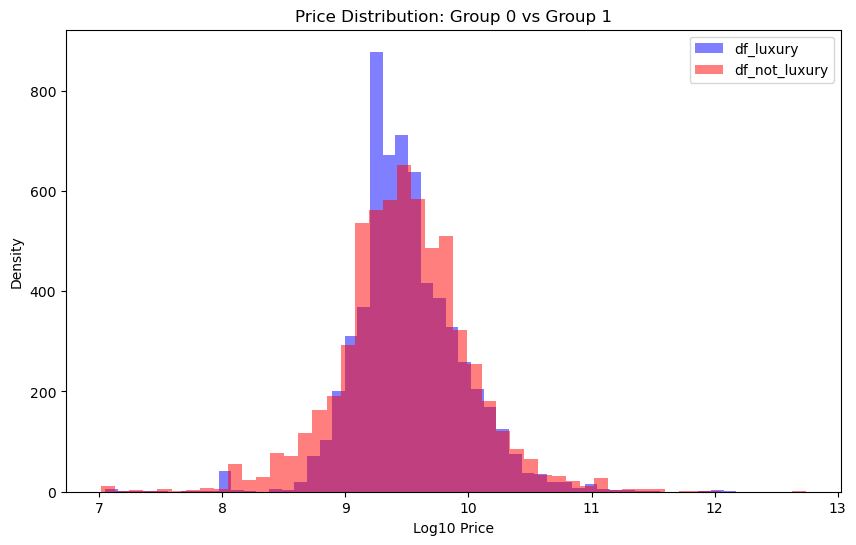

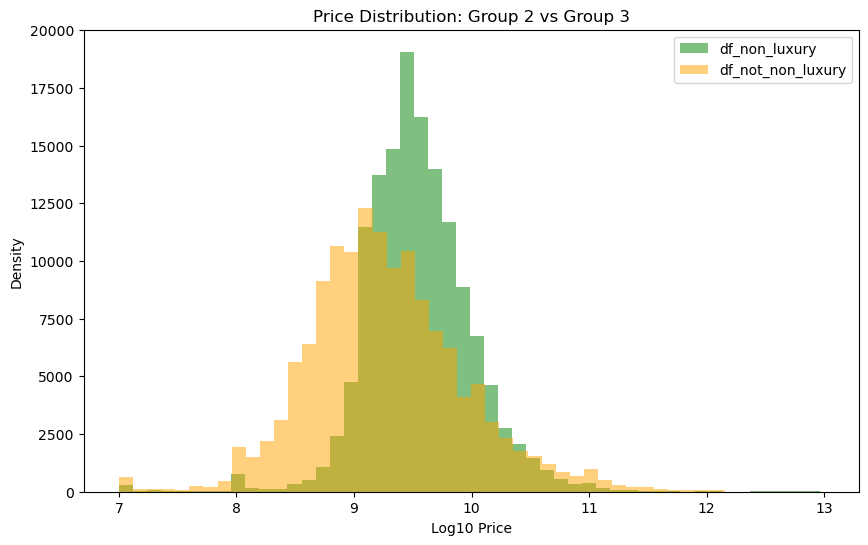

In [77]:
plt.figure(figsize=(10,6))
plt.hist(np.log10(dfs[0]["price_value"].dropna()), bins=50, alpha=0.5, color='blue', label=lables[0])
plt.hist(np.log10(dfs[1]["price_value"].dropna().sample(dfs[0].shape[0], random_state=42)), bins=50, alpha=0.5, color='red', label=lables[1])
plt.xlabel("Log10 Price")
plt.ylabel("Density")
plt.title("Price Distribution: Group 0 vs Group 1")
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.hist(np.log10(dfs[2]["price_value"].dropna().sample(dfs[3].shape[0])), bins=50, alpha=0.5, color='green', label=lables[2])
plt.hist(np.log10(dfs[3]["price_value"].dropna()), bins=50, alpha=0.5, color='orange', label=lables[3])
plt.xlabel("Log10 Price")
plt.ylabel("Density")
plt.title("Price Distribution: Group 2 vs Group 3")
plt.legend()
plt.show()

In [ ]:
from scipy.stats import shapiro

for i , dfx in enumerate(dfs):
    test = 0
    for j in range(10):
        shapiro_test = shapiro(np.log10(dfx["price_value"].sample(1000, random_state=j)))
        if shapiro_test.pvalue > 0.05:
            test += 1
    if test > 5:
        print(lables[i], " is Normal :", test)
    else:
        print(lables[i], " is NOT Normal :" , test)    



df_luxury  is NOT Normal : 0
df_not_luxury  is NOT Normal : 0
df_non_luxury  is NOT Normal : 0
df_not_non_luxury  is NOT Normal : 0


In [79]:
from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(np.log10(df_luxury["price_value"]) , np.log10(df_not_luxury["price_value"]))

if p_value < 0.05:
    print('Reject Null Hypothesis (Significant difference between two samples) p =', p_value)
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples) p =' ,p_value)



Reject Null Hypothesis (Significant difference between two samples) p = 9.467889814781265e-08


In [80]:
from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(np.log10(df_luxury["price_value"].sample(min(df_luxury.shape[0], df_not_luxury.shape[0]), random_state=42)) , np.log10(df_not_luxury["price_value"].sample(min(df_luxury.shape[0], df_not_luxury.shape[0]), random_state=42)))

if p_value < 0.05:
    print('Reject Null Hypothesis (Significant difference between two samples) p =', p_value)
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples) p =' ,p_value)


Reject Null Hypothesis (Significant difference between two samples) p = 0.015969539366443797


<div dir="rtl">

**گروه 0 vs 1:** آزمون Mann-Whitney نشان‌دهنده تفاوت آماری است (p = 0.016).

</div>


In [81]:
group1 = np.log10(df_luxury["price_value"].dropna().sample(min(df_luxury.shape[0], df_not_luxury.shape[0]), random_state=42))
group2 = np.log10(df_not_luxury["price_value"].dropna().sample(min(df_luxury.shape[0], df_not_luxury.shape[0]), random_state=42))

u_stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided', method='asymptotic')

# Compute effect size
n1 = len(group1)
n2 = len(group2)
N = n1 + n2

# Mean and std of U under null
mu_U = n1 * n2 / 2
sigma_U = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)

# Z-score
z = (u_stat - mu_U) / sigma_U

# Effect size
r = z / np.sqrt(N)

print(f"Mann-Whitney p-value: {p_value}")
print(f"Effect size r: {r:.4f}")

Mann-Whitney p-value: 0.015969539366443797
Effect size r: 0.0217


<div dir="rtl">

**گروه 0 vs 1:** اندازه اثر بسیار کوچک است (r = 0.022)، تفاوت عملی قابل توجهی ندارد.

</div>


In [82]:
group3 = np.log10(df_non_luxury["price_value"].sample(min(df_non_luxury.shape[0], df_not_non_luxury.shape[0]), random_state=42))
group4 = np.log10(df_not_non_luxury["price_value"].sample(min(df_non_luxury.shape[0], df_not_non_luxury.shape[0]), random_state=42))

stat, p_value = mannwhitneyu(group3 , group4)

# Compute effect size
n1 = len(group3)
n2 = len(group4)
N = n1 + n2

# Mean and std of U under null
mu_U = n1 * n2 / 2
sigma_U = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)

# Z-score
z = (stat - mu_U) / sigma_U

# Effect size
r = z / np.sqrt(N)



if p_value < 0.05:
    print('Reject Null Hypothesis (Significant difference between two samples) p =', p_value)
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples) p =' ,p_value)

print(f"Effect size r: {r:.4f}")

Reject Null Hypothesis (Significant difference between two samples) p = 0.0
Effect size r: 0.2774


<div dir="rtl">

**گروه 2 vs 3:** اندازه اثر متوسط است (r = 0.277)، تفاوت عملی قابل توجه است.

</div>


<div  dir="rtl" align="right">


«نتایج آزمون Mann–Whitney U نشان داد که هم وجود امکانات لاکچری و هم وجود امکانات غیرلاکچری منجر به تفاوت معنادار در قیمت آگهی‌ها می‌شود (p-value < 0.05). با این حال، اثر امکانات لاکچری از نظر شدت و تفاوت قیمتی قوی‌تر و چشم‌گیرتر است.»

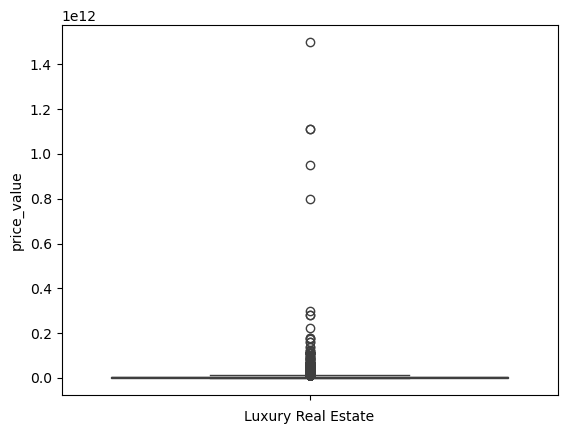

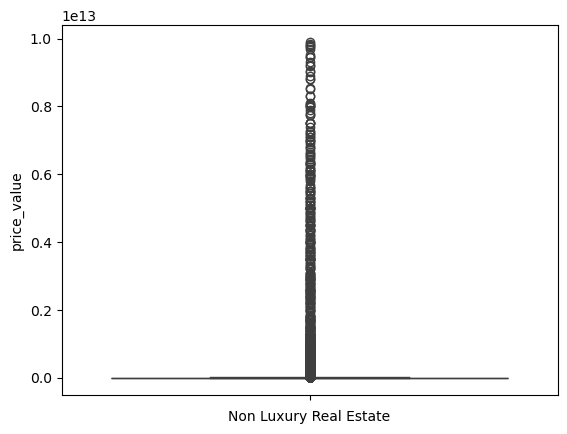

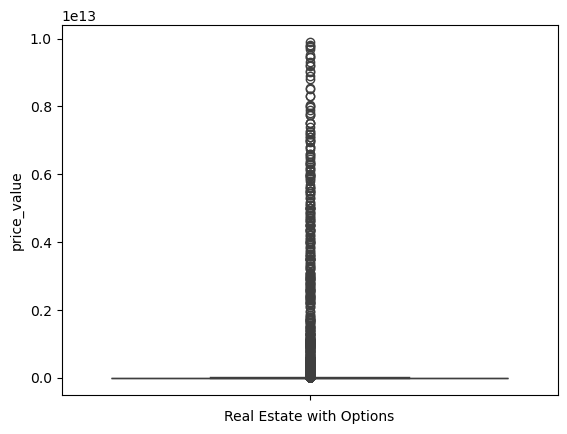

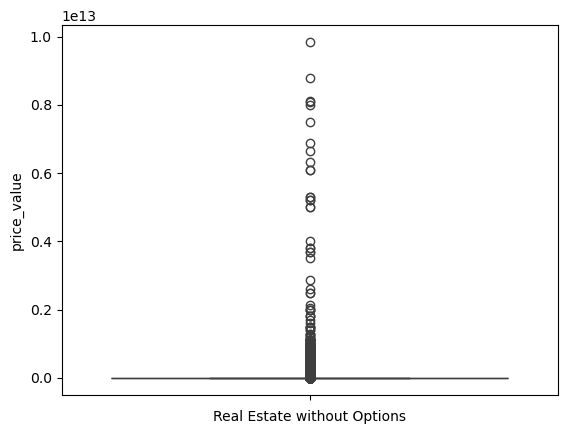

In [83]:
sns.boxplot(df_luxury["price_value"])
plt.xlabel("Luxury Real Estate")
plt.show()
sns.boxplot(df_not_luxury["price_value"])
plt.xlabel("Non Luxury Real Estate")
plt.show()

sns.boxplot(df_non_luxury["price_value"])
plt.xlabel("Real Estate with Options")
plt.show()
sns.boxplot(df_not_non_luxury["price_value"])
plt.xlabel("Real Estate without Options")
plt.show()
